<h1>Compute 95% Confidence Interval for SIR Predictions</h1>

<p>In this tutorial we are going how to insert uncertainties in our preditctions. For achive it we are going to compute a non-parametric interval around our predictions. The interval is created using a techinique called bootstrap.</p>

<p>It's easy to compute confidence interval using the class SIR_EDO. This class now have a method calling fit_predictCI that returns a pandas data frame, with all you need to put uncertainties around your predictions. This methods take advantage of multprocessing system and can be distributed across your system.</p>

In [1]:
import multiprocessing as mp
import sys
#add the path were the models are
sys.path.append("../inProduction/")
import pandas as pd
import numpy as np
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from itertools import repeat
import time
from functools import reduce
from sirGA import SIR_GA
#set default theme for plts
theme_set(theme_linedraw())

In [2]:
data = pd.read_csv("../data/estados.csv")
#Select only Sao Paulo
sp = data[data["state"] == "SP"]
#Remove missing values to not crash the intervals
sp = sp.dropna()
#create a series with the cummulative number of cases
y = sp["TOTAL"]

#Give the number of days since the day of first case confirmed
x = range(0,len(sp["newCases"]))

In [3]:
#start model
model = SIR_GA(50000000)

In [4]:
model.fit(x = x, y = y)

In [5]:
start = time.time()
resultdf = model.predictCI(x = x, y = y, ndays = 7, start = "2020-02-25",  bootstrap = 60, n_jobs = 8)
end = time.time()
print("Bootstrap tooks {} minutes to run".format((end - start)/60))

Bootstrap tooks 3.0231442054112754 minutes to run


In [6]:
resultdf

,date,Pred,Pred_lb,Pred_ub,I,I_lb,I_ub,S,S_lb,S_ub,R,R_lb,R_ub
0,2020-02-25,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+07,5.000000e+07,5.000000e+07,0.000000,0.000000,0.000000
1,2020-02-26,1.459348,1.456081,1.461149,1.225442,1.223291,1.227949,5.000000e+07,5.000000e+07,5.000000e+07,0.234088,0.230512,0.234303
2,2020-02-27,2.021589,2.013575,2.026477,1.501394,1.496138,1.507531,5.000000e+07,5.000000e+07,5.000000e+07,0.520509,0.512466,0.521420
3,2020-02-28,2.709970,2.695227,2.719938,1.839270,1.829633,1.850545,5.000000e+07,5.000000e+07,5.000000e+07,0.871078,0.857440,0.873367
4,2020-02-29,3.555463,3.531825,3.573206,2.254279,2.238543,2.272724,5.000000e+07,5.000000e+07,5.000000e+07,1.301612,1.280857,1.306156
5,2020-03-01,4.621342,4.582913,4.650812,2.777474,2.753136,2.806052,5.000000e+07,5.000000e+07,5.000000e+07,1.844642,1.814857,1.852395
6,2020-03-02,5.927027,5.867290,5.971278,3.417767,3.382105,3.459707,4.999999e+07,4.999999e+07,4.999999e+07,2.509041,2.469421,2.521443
7,2020-03-03,7.493643,7.405903,7.560538,4.186522,4.135471,4.246729,4.999999e+07,4.999999e+07,4.999999e+07,3.306431,3.256702,3.325992
8,2020-03-04,9.464617,9.338952,9.563629,5.153695,5.081473,5.238969,4.999999e+07,4.999999e+07,4.999999e+07,4.309770,4.249179,4.339410
9,2020-03-05,11.864324,11.692748,12.003061,6.331250,6.232955,6.447401,4.999999e+07,4.999999e+07,4.999999e+07,5.531431,5.455125,5.573476


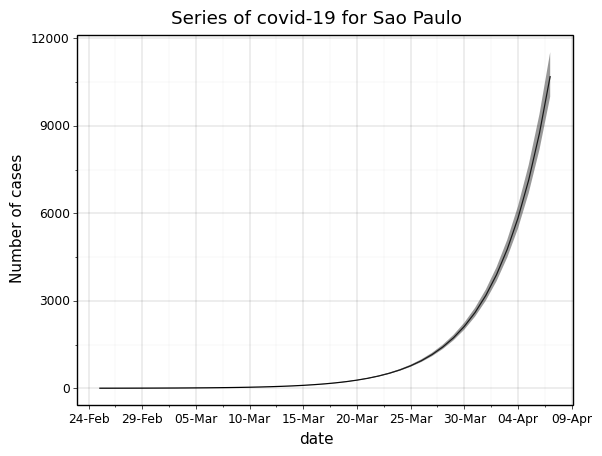

<ggplot: (-9223363262288912198)>

In [7]:
#plot graph using ggplot
(ggplot(resultdf) + 
    geom_line(aes(x = "date", y = "Pred")) +
    geom_ribbon(aes(x = "date", ymin = "Pred_lb", ymax = "Pred_ub"), alpha = 0.5) +
    scale_x_datetime(breaks = date_breaks('5 days'), labels=date_format('%d-%b')) +
    ggtitle("Series of covid-19 for Sao Paulo") +
    ylab("Number of cases"))